In [1]:
import pandas

size_log = pandas.read_pickle("4-generated-mdps/success.pkl.gz")
aborts = pandas.read_pickle("4-generated-mdps/fail.pkl.gz")

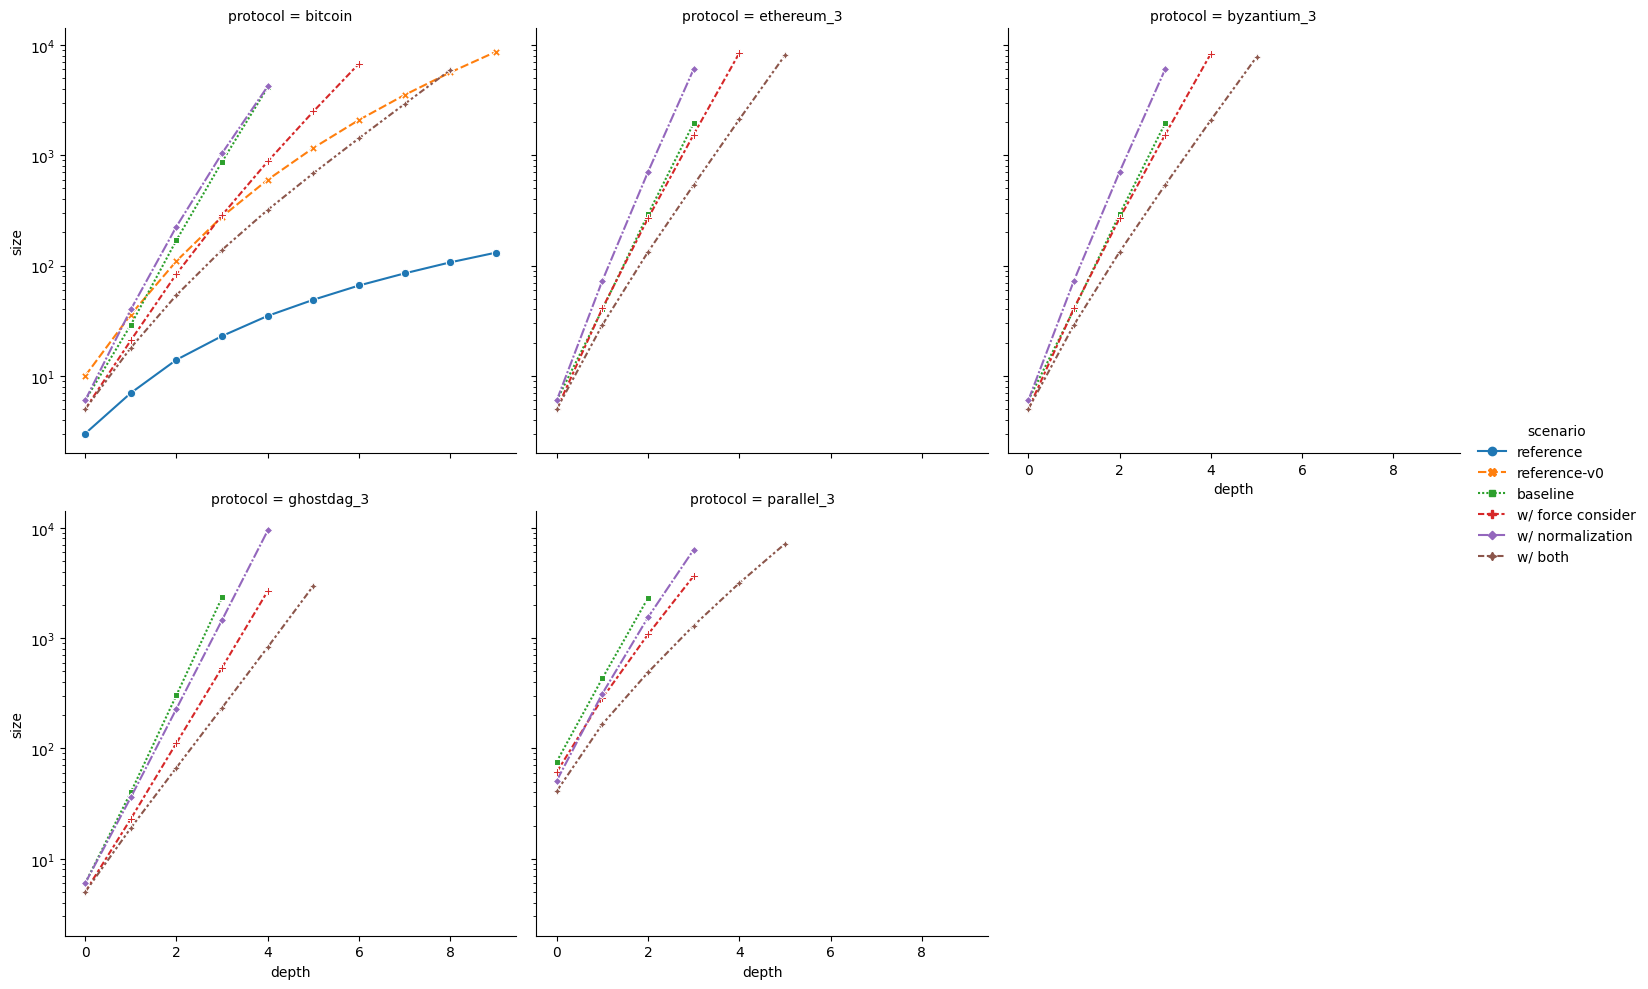

In [2]:
import seaborn

seaborn.relplot(
    data=size_log.query("depth < 10"),
    kind="line",
    x="depth",
    y="size",
    hue="scenario",
    style="scenario",
    markers=True,
    col="protocol",
    col_wrap=3,
).set(yscale="log")

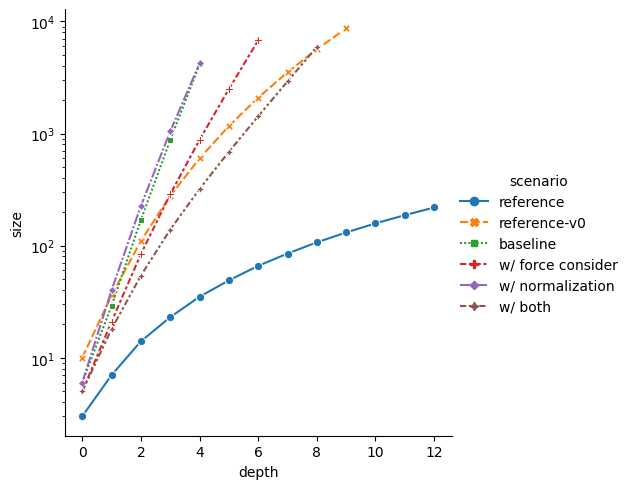

In [3]:
seaborn.relplot(
    data=size_log.query("protocol == 'bitcoin' and depth < 13"),
    kind="line",
    x="depth",
    y="size",
    hue="scenario",
    style="scenario",
    markers=True,
).set(yscale="log")

In [4]:
scenario_labels = {
    "reference": "reference-fc16",
    "reference-v0": "drop",
    "baseline": "baseline",
    "w/o garbage collection": "baseline-gc",
    "w/ force consider": "baseline+fc",
    "w/ normalization": "baseline+n",
    "w/ both": "baseline+fc+n",
}

depth_cutoff = max(size_log.query("scenario != 'reference'").depth) + 1

btc_size = (
    size_log.assign(scenario=[scenario_labels[x] for x in size_log.scenario])
    .query("scenario != 'drop'")
    .query("protocol == 'bitcoin'")
    .query(f"depth <= {depth_cutoff}")
    .pivot(index="depth", columns="scenario", values="size")
)

btc_size.to_csv("4-state-space-exploration-viz-for-paper-btc-size.csv")
btc_size

scenario,baseline,baseline+fc,baseline+fc+n,baseline+n,reference-fc16
depth,,,,,
0,6.0,5.0,5.0,6.0,3.0
1,29.0,21.0,18.0,40.0,7.0
2,170.0,84.0,54.0,226.0,14.0
3,875.0,287.0,139.0,1044.0,23.0
4,4135.0,879.0,320.0,4220.0,35.0
5,NaN,2494.0,687.0,NaN,49.0
6,NaN,6773.0,1427.0,NaN,66.0
7,NaN,NaN,2918.0,NaN,85.0
8,NaN,NaN,5933.0,NaN,107.0


In [5]:
# how should we report on the other protocols?
# column a: show max depth explored in table for fully optimized exploration only; calculate blow up factor and add as columns


def tabulate_deepest(d):
    return d.iloc[d.groupby(["scenario", "protocol"]).depth.idxmax()]


deepest = (
    tabulate_deepest(size_log)
    .reset_index(drop=True)
    .query("scenario != 'w/o garbage collection'")
    .query("scenario != 'reference-v0'")
)

deepest.to_pickle("4-generated-mdps/deepest.pkl.gz")

deepest

,scenario,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,depth,size,time_spent,rss,mdp
0,baseline,generic_1,False,False,True,True,False,bitcoin,4,4135,2.029458,0.171410,67480746
1,baseline,generic_1,False,False,True,True,False,byzantium_3,3,1954,1.954901,0.171314,756ab0cf
2,baseline,generic_1,False,False,True,True,False,ethereum_3,3,1954,1.678936,0.168095,a33087de
3,baseline,generic_1,False,False,True,True,False,ghostdag_3,3,2340,2.951587,0.173038,56802fc7
4,baseline,generic_1,False,False,True,True,False,parallel_3,2,2310,1.798520,0.188206,4a4d39fb
5,reference,fc16sapirshtein,True,True,True,True,True,bitcoin,88,9947,25.279514,0.167507,3e432955
7,w/ both,generic_1,True,True,True,True,False,bitcoin,8,5933,8.675796,0.203316,380d9157
8,w/ both,generic_1,True,True,True,True,False,byzantium_3,5,7765,13.966019,0.226807,1d8043ea
9,w/ both,generic_1,True,True,True,True,False,ethereum_3,5,8053,12.654276,0.229637,533b9099
10,w/ both,generic_1,True,True,True,True,False,ghostdag_3,5,2978,7.320063,0.201752,47a82b3c


In [6]:
# how should we report on the other protocols?
# column b: fix depth in table

fixed_depth = min(deepest.depth)
fixed = (
    size_log.query("scenario != 'w/o garbage collection'")
    .query("scenario != 'reference-v0'")
    .query(f"depth == {fixed_depth}")
    .reset_index(drop=True)
)
fixed.to_pickle("4-generated-mdps/fixed.pkl.gz")
fixed

,scenario,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,depth,size,time_spent,rss,mdp
0,reference,fc16sapirshtein,True,True,True,True,True,bitcoin,2,14,0.119098,0.134392,570728f2
1,baseline,generic_1,False,False,True,True,False,bitcoin,2,170,0.151168,0.162254,2a81beda
2,baseline,generic_1,False,False,True,True,False,ethereum_3,2,292,0.624411,0.168095,5b3f082d
3,baseline,generic_1,False,False,True,True,False,byzantium_3,2,292,0.713638,0.171314,df34fc2c
4,baseline,generic_1,False,False,True,True,False,ghostdag_3,2,304,0.687678,0.173038,e34a0b77
5,baseline,generic_1,False,False,True,True,False,parallel_3,2,2310,1.798520,0.188206,4a4d39fb
6,w/ force consider,generic_1,True,False,True,True,False,bitcoin,2,84,0.575025,0.175873,6be26031
7,w/ force consider,generic_1,True,False,True,True,False,ethereum_3,2,268,0.749025,0.180649,32466b1e
8,w/ force consider,generic_1,True,False,True,True,False,byzantium_3,2,268,0.777951,0.181236,1465ac22
9,w/ force consider,generic_1,True,False,True,True,False,ghostdag_3,2,112,0.661531,0.184025,4838cd52


In [7]:
combined = pandas.DataFrame(
    dict(
        max_depth=deepest.set_index(["scenario", "protocol"]).depth,
        size_at_fixed_depth=fixed.set_index(["scenario", "protocol"])["size"],
    )
).reset_index()
combined

,scenario,protocol,max_depth,size_at_fixed_depth
0,baseline,bitcoin,4,170
1,baseline,byzantium_3,3,292
2,baseline,ethereum_3,3,292
3,baseline,ghostdag_3,3,304
4,baseline,parallel_3,2,2310
5,reference,bitcoin,88,14
6,w/ both,bitcoin,8,54
7,w/ both,byzantium_3,5,133
8,w/ both,ethereum_3,5,133
9,w/ both,ghostdag_3,5,67


In [8]:
fixed_depth

2

In [9]:
combined.query('scenario != "reference"').set_index(["scenario", "protocol"]).unstack(
    level=0
).stack(level=0, future_stack=True).unstack(level=1)

scenario     baseline                       w/ both                      \
            max_depth size_at_fixed_depth max_depth size_at_fixed_depth   
protocol                                                                  
bitcoin             4                 170         8                  54   
byzantium_3         3                 292         5                 133   
ethereum_3          3                 292         5                 133   
ghostdag_3          3                 304         5                  67   
parallel_3          2                2310         5                 489   

scenario    w/ force consider                     w/ normalization  \
                    max_depth size_at_fixed_depth        max_depth   
protocol                                                             
bitcoin                     6                  84                4   
byzantium_3                 4                 268                3   
ethereum_3                  4                 268                3   
ghostdag_3                  4                 112                4   
parallel_3                  3                1081                3   

scenario                         
            size_at_fixed_depth  
protocol                         
bitcoin                     226  
byzantium_3                 706  
ethereum_3                  706  
ghostdag_3                  229  
parallel_3                 1542